In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

**To scrape the data we will use BeautifulSoup**

In [14]:
soup = BeautifulSoup("http", 'html.parser')

#Let's start on the main page of the website
URL = 'https://www.androidrank.org/android-most-popular-google-play-apps'
r = requests.get(URL)
page_body = r.text
soup = BeautifulSoup(page_body, 'html.parser')

# Initialization of an empty dataframe with the desired columns (URL is ou unique ID)
new_columns = ["URL", 'Rank','Name', 'Nb_Rating', 'Installs', 'Avg_Rating', "Ev_30", "Ev_60", "Price", "Category"]
app_pd = pd.DataFrame(columns=new_columns)

# We go throught all the categories and take all the given app and their ranking in that category
nav = soup.find("nav")
start = nav.find("b", text="Comics") #1
for b in start.find_next_siblings("b"):
    a = b.find("a")
    Category = a.get_text()
    
    # Now we move on the webpage of the desired category
    URL = 'https://www.androidrank.org/'+a["href"]
    r = requests.get(URL)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    
    # We select all the app on the webpage with all their informations
    table = soup.find("table", id="ranklist")
    apps = table.find_all("tr")[1:]
    for app in apps:
        
        # Ev_30 and Ev_60 corresponds to the growth of the number of ratings over the 30 and 60 respectively
        URL, Rank, Name, Nb_Rating, Installs, Avg_Rating, Ev_30, Ev_60, Price = '','','','','','','','',''
        p = app.find_all("td")
        Rank = p[0].text
        URL = p[1].find('a', href=True)["href"]
        Name = p[1].find('a', href=True).text
        Nb_Rating = p[3].text
        Installs = p[4].text
        Avg_Rating = p[5].text
        Ev_30 = p[6].text
        Ev_60 = p[7].text
        Price = p[8].text
        
        # We create a "dummy" dataframe to organize the collected data
        characteristics_pd = pd.DataFrame([[URL, Rank, Name, Nb_Rating, Installs, Avg_Rating,
                                            Ev_30, Ev_60, Price,Category]], columns = new_columns)
        
        # We append this dataframe to the global dataframe
        app_pd = app_pd.append(characteristics_pd,ignore_index=True)
    
    #we get the the URL for the next page in the same category
    nextpage = soup.find_all('small')[1].find("a", text="Next >")
    
    # We continue this until there is no next page in the given category anymore
    while(len(nextpage['href'])):
        
        urlnext_page = "https://www.androidrank.org" + nextpage['href']
        r = requests.get(urlnext_page)
        page_body = r.text
        soup = BeautifulSoup(page_body, 'html.parser')

        table = soup.find("table", id="ranklist")
        apps = table.find_all("tr")[1:]

        for app in apps:
            URL, Rank, Name, Nb_Rating, Installs, Avg_Rating, Ev_30, Ev_60, Price = '','','','','','','','',''
            p = app.find_all("td")
            Rank = p[0].text
            URL = p[1].find('a', href=True)["href"]
            Name = p[1].find('a', href=True).text
            Nb_Rating = p[3].text
            Installs = p[4].text
            Avg_Rating = p[5].text
            Ev_30 = p[6].text
            Ev_60 = p[7].text
            Price = p[8].text
            characteristics_pd = pd.DataFrame([[URL, Rank, Name, Nb_Rating, Installs, Avg_Rating,
                                                Ev_30, Ev_60, Price, Category]], columns = new_columns)
            app_pd = app_pd.append(characteristics_pd,ignore_index=True)
            
            # To avoid a crash due to the return of a None when there is no next page we manually set it to ""
            if(soup.find_all('small')[1].find("a", text="Next >")):
                nextpage = soup.find_all('small')[1].find("a", text="Next >")
            else:
                nextpage["href"] = ""

AttributeError: 'NoneType' object has no attribute 'find_all'

**Due to the excess of requests, we had to relaunch the previous cell and modify line #1 to restart from the desired category**

In [81]:
# Read the first csv containing data
df_app = pd.read_csv('data/1.csv', index_col=[0])

# Iterate through the 7 remaining files
for i in range(2,9):
    df_temp = pd.read_csv('data/' + str(i) + '.csv', index_col=[0])
    df_app = pd.concat([df_app, df_temp], ignore_index=True, join='inner')
    
# Dropping duplicates since the parsing was sometimes stopped during the analysis of one category of apps
df_app.drop_duplicates(inplace = True)
df_app.to_csv("data/final_dataset.csv")

**At the end we have the following datasets**

In [158]:
df_app = pd.read_csv('data/final_dataset.csv', index_col=[0])
df_app.head(10)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category
0,/application/canva_graphic_design_video_invite...,1.0,"Canva: Graphic Design, Video, Invite & Logo Maker","2,241,579",50.0 M,4.68,4.7%,8.8%,Free,Art & Design
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,2.0,ibis Paint X,"642,389",10.0 M,4.45,4.4%,9.0%,Free,Art & Design
2,/application/kappboom_cool_wallpapers_backgrou...,3.0,Kappboom - Cool Wallpapers & Background Wallpa...,"399,327",10.0 M,4.63,0.0%,0.0%,Free,Art & Design
3,/application/flipaclip_cartoon_animation/com.v...,4.0,FlipaClip: Cartoon animation,"319,841",10.0 M,4.28,1.5%,3.2%,Free,Art & Design
4,/application/u_launcher_lite_new_3d_launcher_2...,5.0,"U Launcher Lite-New 3D Launcher 2019, Hide apps","216,161",10.0 M,4.52,1.6%,3.4%,Free,Art & Design
5,/application/medibang_paint_make_art_/com.medi...,6.0,MediBang Paint - Make Art !,"194,262",10.0 M,4.10,1.2%,2.5%,Free,Art & Design
6,/application/u_launcher_3d_new_launcher_2019_3...,7.0,"U Launcher 3D: New Launcher 2019, 3d themes","130,195",5.0 M,4.50,1.1%,2.0%,Free,Art & Design
7,/application/papercolor/com.eyewind.paperone,8.0,PaperColor,"111,058",10.0 M,4.23,1.9%,4.2%,Free,Art & Design
8,/application/sand_draw_sketch_drawing_pad_crea...,9.0,Sand Draw Sketch Drawing Pad: Creative Doodle Art,"99,055",5.0 M,4.37,0.9%,1.9%,Free,Art & Design
9,/application/how_to_draw_graffitis/com.sweefit...,10.0,How to Draw Graffitis,"94,175",5.0 M,4.33,0.2%,0.4%,Free,Art & Design


In [159]:
print('URL: ' + str(df_app.URL.isnull().values.any()))
print('Rank: ' + str(df_app.Rank.isnull().values.any()))
print('Name: ' + str(df_app.Name.isnull().values.any()))
print('Nb_Rating: ' + str(df_app.Nb_Rating.isnull().values.any()))
print('Installs: ' + str(df_app.Installs.isnull().values.any()))
print('Avg_Rating: ' + str(df_app.Avg_Rating.isnull().values.any()))
print('Ev_30: ' + str(df_app.Ev_30.isnull().values.any()))
print('Ev_60: ' + str(df_app.Ev_60.isnull().values.any()))
print('Price: ' + str(df_app.Price.isnull().values.any()))
print('Category: ' + str(df_app.Category.isnull().values.any()))

URL: False
Rank: False
Name: False
Nb_Rating: False
Installs: False
Avg_Rating: False
Ev_30: False
Ev_60: False
Price: False
Category: True


**The only column with null values is the Category. It corresponds to the global ranking of all apps that were parsed, where the category was not mentionned. Since these apps already appear in their own category (if they are in the global top 500, they are also in their own category top 500), they are duplicates. So let's drop them.**

In [160]:
df_app.dropna(inplace=True)
df_app.isna().values.any()

False

**Isn't it weird that we don't have 24 500 rows since we have a top 500 in each category and 49 categories?**
**Let's have a closer look**

In [161]:
df_app.Category.value_counts().tail(10)

Game Racing      500
Video Players    500
Game Music       500
Art & Design     500
Game Card        500
Dating           500
House & Home     500
Business         500
Game Casual      500
Events           297
Name: Category, dtype: int64

**By looking on the website, we see that this is not a scraping problem but that some categories have less app in the Top. This is already a good thing to highlights the difference of diversity between each categories**

**Little bit of cleaning let's convert back the number from string to int**

In [162]:
df_app["Nb_Rating"] = df_app["Nb_Rating"].str.replace(',', '')
df_app["Nb_Rating"] = df_app["Nb_Rating"].astype(int)
df_app["Installs"] = df_app["Installs"].str.replace(' ', '')
df_app["Installs"] = (df_app["Installs"].str.replace(r'[kM]+$', '', regex=True).astype(float) * \
                        df_app["Installs"].str.extract(r'[\d\.]+([kM]+)', expand=False)
                         .fillna(1)
                          .replace(['k','M'], [10**3, 10**6]).astype(int))
df_app["Avg_Rating"] = df_app["Avg_Rating"].astype(float)
df_app["Ev_30"] = df_app["Ev_30"].str.replace('%', '').astype(float)
df_app["Ev_60"] = df_app["Ev_60"].str.replace('%', '').astype(float)
df_app.head(5)

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category
0,/application/canva_graphic_design_video_invite...,1.0,"Canva: Graphic Design, Video, Invite & Logo Maker",2241579,50000000.0,4.68,4.7,8.8,Free,Art & Design
1,/application/ibis_paint_x/jp.ne.ibis.ibispaint...,2.0,ibis Paint X,642389,10000000.0,4.45,4.4,9.0,Free,Art & Design
2,/application/kappboom_cool_wallpapers_backgrou...,3.0,Kappboom - Cool Wallpapers & Background Wallpa...,399327,10000000.0,4.63,0.0,0.0,Free,Art & Design
3,/application/flipaclip_cartoon_animation/com.v...,4.0,FlipaClip: Cartoon animation,319841,10000000.0,4.28,1.5,3.2,Free,Art & Design
4,/application/u_launcher_lite_new_3d_launcher_2...,5.0,"U Launcher Lite-New 3D Launcher 2019, Hide apps",216161,10000000.0,4.52,1.6,3.4,Free,Art & Design


**Now let's see the repartion of the free and paid app on the Google Play Store**

In [163]:
df_app["Price"].value_counts().head(10)

Free     24172
$4.99       23
$0.99       19
$2.99       18
$1.99       15
$3.99       10
$6.99        5
$9.99        4
$5.99        4
$2.49        4
Name: Price, dtype: int64

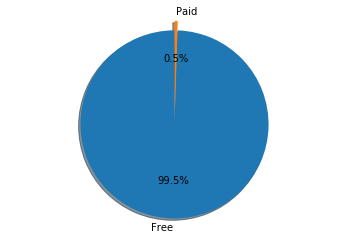

In [164]:
labels = 'Free', 'Paid'
explode = (0.1,0) #In order to highlights Free app

fig, ax = plt.subplots()
ax.pie([np.shape(df_app[df_app["Price"]=="Free"])[0], np.shape(df_app[df_app["Price"]!="Free"])[0]],
           explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Now let's see this distribution over all the categories**

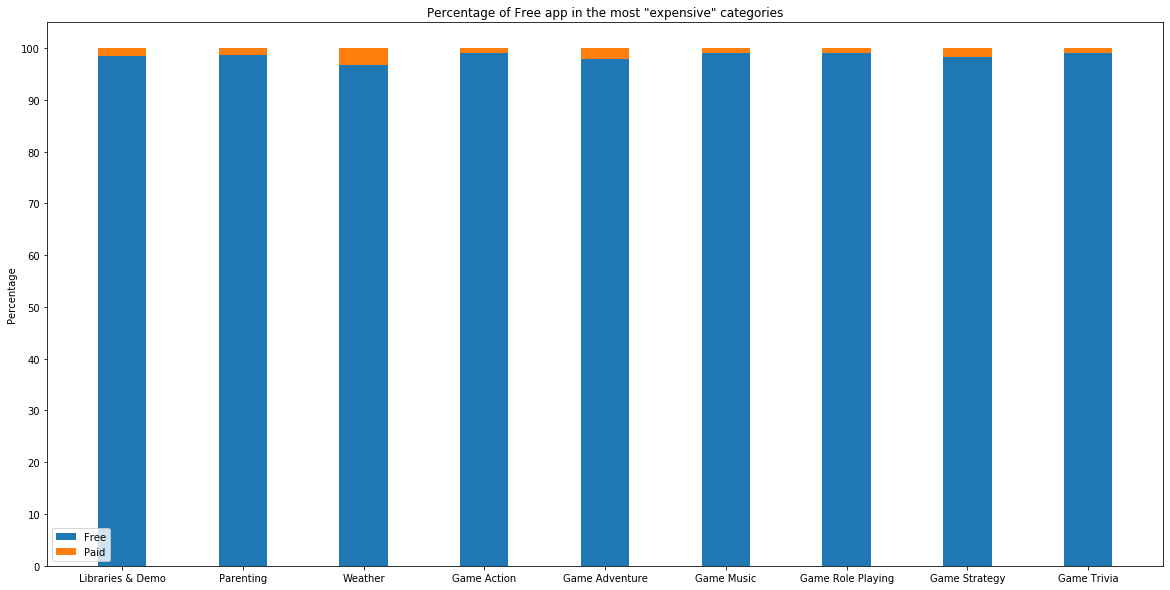

In [178]:
free = []
paid = []
label =[]
for category in df_app.Category.unique():
    free_cat = np.shape(df_app[(df_app["Price"]=="Free") & (df_app["Category"]== category)])[0]
    paid_cat = np.shape(df_app[(df_app["Price"]!="Free") & (df_app["Category"]== category)])[0]
    if((paid_cat/(free_cat+paid_cat))*100 >=1):
        label.append(category)
        free.append(free_cat/(free_cat+paid_cat)*100)
        paid.append((paid_cat/(free_cat+paid_cat))*100)
ind = np.arange(len(free))    
width = 0.4      
plt.figure(figsize=(20,10))
p1 = plt.bar(ind, free, width,)
p2 = plt.bar(ind, paid, width,
             bottom=free)

plt.ylabel("Percentage")
plt.title('Percentage of Free app in the most "expensive" categories')
plt.xticks(ind, label)
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Free', 'Paid'))

plt.show()

In [139]:
df_app["Nb_Rating"].describe()

count    2.479700e+04
mean     2.840898e+05
std      2.201660e+06
min      1.000000e+02
25%      8.531000e+03
50%      3.298200e+04
75%      1.028380e+05
max      1.068849e+08
Name: Nb_Rating, dtype: float64

In [140]:
df_app["Installs"].describe()

count    2.479700e+04
mean     1.701332e+07
std      1.678899e+08
min      1.000000e+00
25%      1.000000e+06
50%      1.000000e+06
75%      5.000000e+06
max      5.000000e+09
Name: Installs, dtype: float64

In [173]:
df_app[df_app["Installs"]== df_app["Installs"].max()]

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category
3000,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication
3003,/application/google_chrome_fast_secure/com.and...,4.0,Google Chrome: Fast & Secure,19578408,5.000000e+09,4.37,2.9,5.6,Free,Communication
3009,/application/gmail/com.google.android.gm,10.0,Gmail,6743557,5.000000e+09,4.40,1.7,2.9,Free,Communication
9499,/application/google_play_music/com.google.andr...,3.0,Google Play Music,4382860,5.000000e+09,4.10,1.1,1.9,Free,Music & Audio
12458,/application/google_drive/com.google.android.a...,2.0,Google Drive,5081538,5.000000e+09,4.39,2.5,4.7,Free,Productivity
13457,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social
14457,/application/google_play_services/com.google.a...,1.0,Google Play services,28257988,5.000000e+09,4.26,1.6,3.5,Free,Tools
14459,/application/google/com.google.android.googleq...,3.0,Google,13997467,5.000000e+09,4.41,2.1,3.9,Free,Tools
14478,/application/android_accessibility_suite/com.g...,22.0,Android Accessibility Suite,1830589,5.000000e+09,4.36,2.2,3.4,Free,Tools
14481,/application/google_text_to_speech/com.google....,25.0,Google Text-to-Speech,1661524,5.000000e+09,4.35,2.3,3.5,Free,Tools


In [174]:
df_app[df_app["Nb_Rating"] > 50000000]

,URL,Rank,Name,Nb_Rating,Installs,Avg_Rating,Ev_30,Ev_60,Price,Category
3000,/application/whatsapp_messenger/com.whatsapp,1.0,WhatsApp Messenger,106884902,5.000000e+09,4.29,1.8,3.4,Free,Communication
3001,/application/messenger_text_and_video_chat_for...,2.0,Messenger – Text and Video Chat for Free,71185969,1.000000e+09,4.24,0.5,1.1,Free,Communication
13457,/application/facebook/com.facebook.katana,1.0,Facebook,96409662,5.000000e+09,4.24,0.9,1.9,Free,Social
13458,/application/instagram/com.instagram.android,2.0,Instagram,95806924,1.000000e+09,4.46,1.4,2.8,Free,Social
15517,/application/youtube/com.google.android.youtube,1.0,YouTube,67255190,5.000000e+09,4.14,2.2,4.0,Free,Video Players
23957,/application/clash_of_clans/com.supercell.clas...,1.0,Clash of Clans,51568217,5.000000e+08,4.51,0.3,0.7,Free,Game Strategy


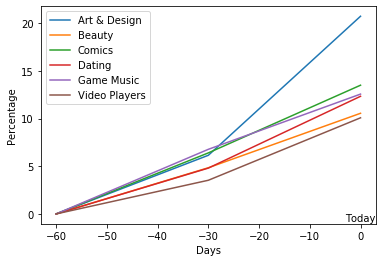

In [202]:
grouped = df_app.groupby("Category")["Ev_30","Ev_60"].mean()

for index in grouped[grouped["Ev_60"] > 10].index:
    x = [-60,-30,0]
    y = [0,grouped.loc[index,"Ev_30"],grouped.loc[index,"Ev_60"]]
    plt.plot(x, y, label = index)
plt.annotate("Today",(-3,-0.8))
plt.xlabel('Days')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Analysis

**Thanks to an API on the same website we can also get more detailled information but it is limited to 100 requests per hour**

**These cells will be explored later to get more information for the best ranked app in the overall ranking**

In [153]:
import requests
website = "https://www.androidrank.org/api/application/"
app = "com.facebook.katana"
key = "60lnc52x178li1rocmpum3829kdf6d9wt3dp7lqg7vxmqat6ov9ekcoipmqyuzpa"
search = website+app+"?key="+key;
response = requests.get(search)

In [154]:
response.json()

{'category': 'Social',
 'category_rank': {'current': []},
 'developer': {'developer_id': 'Facebook', 'name': 'Facebook'},
 'id': 'com.facebook.katana',
 'images': {'logo': 'https://lh3.googleusercontent.com/ccWDU4A7fX1R24v-vvT480ySh26AYp97g1VrIB_FIdjRcuQB2JP2WdY7h_wVVAeSpg',
  'screenshots': ['https://lh3.googleusercontent.com/JelCBr0rDjDEGOqYb4m2Z7OSVBxS5KyqO94eW5TGnQtHc9k08uaMZVTz6s_rKha31eE',
   'https://lh3.googleusercontent.com/Iomoub5EHkAk1_bKqIyjkFbKQ4vw-zFfTqfUMG_da-4-hV_tXwvuiFQUQWIeol_fRSo',
   'https://lh3.googleusercontent.com/Jx0nPnGaGNRXCHlmGv13gDsIzhLykgkza5y2SUNruZoiwcik5lQ-gj99vdHZA0Zlbtrz',
   'https://lh3.googleusercontent.com/YBTVMqZcl-t16dnH7_DxHsMm7WU2v2HdZRX3Q3UnYHXo8HUfQSuN2Ahn_M4KQunbeigu',
   'https://lh3.googleusercontent.com/o4enSNrWkR4F6wILxPk6-6XkNyea4j9tcn8gLPphbBvhpp4_HBU9NNuQnhzreYH5uSN0']},
 'installs': {'current': {'count': '5000000000'},
  'history': [{'count': 5000000000, 'date': '2019-10-16'},
   {'count': 1000000000, 'date': '2014-08-28'},
   {'co